In [231]:
#importation des packages
import requests
import zipfile
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [20]:
#  Télécharger le fichier ZIP  des données géospatiale du Bénin

url = 'https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_BEN_shp.zip'

zip_file_path = 'geodataBenin'

response = requests.get(url)

if response.status_code == 200:
    with open(zip_file_path, 'wb') as file:
        file.write(response.content)
    print(f"Le fichier a été téléchargé et enregistré sous : {zip_file_path}")
else:
    print("Erreur lors du téléchargement du fichier")
    exit()

Le fichier a été téléchargé et enregistré sous : geodataBenin


In [21]:
# 2. Extraire le contenu du fichier ZIP
extract_dir = 'extracted_files'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
    print(f"Les fichiers ont été extraits dans : {extract_dir}")

Les fichiers ont été extraits dans : extracted_files


In [22]:
# Lister les fichiers SHP extraits
shp_files = [os.path.join(extract_dir, file) for file in os.listdir(extract_dir) if file.endswith('.shp')]
print("Fichiers SHP trouvés :", shp_files)

Fichiers SHP trouvés : ['extracted_files/gadm41_BEN_1.shp', 'extracted_files/gadm41_BEN_2.shp', 'extracted_files/gadm41_BEN_3.shp', 'extracted_files/gadm41_BEN_0.shp']


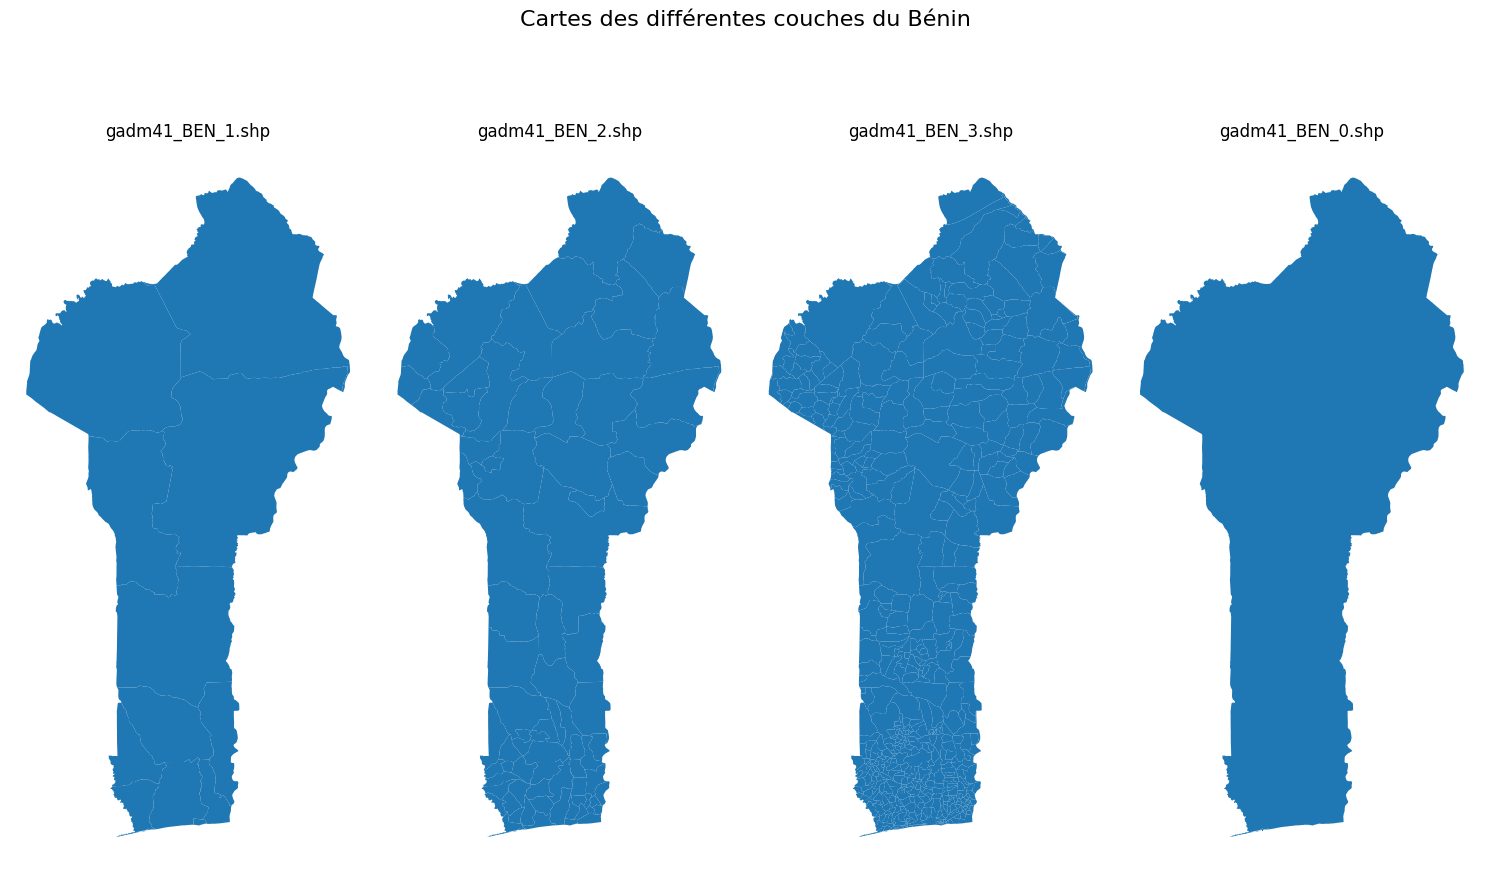

In [23]:
#Créer les subplots
num_files = len(shp_files)
fig, axes = plt.subplots(1, num_files, figsize=(15, 10))  # Une seule ligne avec `num_files` colonnes
fig.suptitle("Cartes des différentes couches du Bénin", fontsize=16)

# 5. Ploter chaque fichier SHP dans un sous-graph
for i in range(num_files):
    shp_file = shp_files[i]
    gdf = gpd.read_file(shp_file)
    gdf.plot(ax=axes[i])
    axes[i].set_title(f"{os.path.basename(shp_file)}")
    axes[i].axis('off')  # Désactive les axes pour une meilleure visualisation
# 6. Afficher la figure
plt.tight_layout()  # Ajuste les espaces entre les subplots
plt.show()

In [63]:
shp=gpd.read_file('extracted_files/gadm41_BEN_2.shp')
shp.head()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,BEN.1.1_1,BEN,Benin,BEN.1_1,Alibori,NA,Banikoara,NA,NA,Commune,Commune,NA,BJ.AL.BA,"POLYGON ((2.80292 11.41028, 2.80624 11.41020, ..."
1,BEN.1.2_1,BEN,Benin,BEN.1_1,Alibori,NA,Gogounou,NA,NA,Commune,Commune,NA,BJ.AL.GO,"POLYGON ((2.78159 10.91505, 2.78333 10.91593, ..."
2,BEN.1.3_1,BEN,Benin,BEN.1_1,Alibori,NA,Kandi,NA,NA,Commune,Commune,NA,BJ.AL.KN,"POLYGON ((3.19599 10.90738, 3.19439 10.90462, ..."
3,BEN.1.4_1,BEN,Benin,BEN.1_1,Alibori,NA,Karimama,NA,NA,Commune,Commune,NA,BJ.AL.KR,"POLYGON ((3.25276 12.00027, 3.24857 11.99418, ..."
4,BEN.1.5_1,BEN,Benin,BEN.1_1,Alibori,NA,Malanville,NA,NA,Commune,Commune,NA,BJ.AL.MA,"POLYGON ((3.58278 11.71444, 3.58833 11.71083, ..."


In [245]:
# Renommer 'Kouffo' en 'Couffo' dans la colonne 'NAME_1'
shp['NAME_1'] = shp['NAME_1'].replace('Kouffo', 'Couffo')
shp['NAME_1'] = shp['NAME_1'].replace('Atakora', 'Atacora')

In [246]:
#selection des 25 communes d'intervention de Bupdos exercice S1 2024
com_intervention=['Kérou', 'Matéri', 'Natitingou', 'Péhunco', 'Tanguiéta', 'Toucountouna', 
                  'Abomey-Calavi',"N'Dali",'Pèrèrè', 'Lalo', 'Djakotomey','Cotonou','Bopa','Comè',
                    'Grand-Popo', 'Houéyogbé', 'Lokossa','Allada','Adja-Ouèrè',
                      'Ifangni', 'Kétou', 'Pobè', 'Sakété', 'Zogbodomey']
len(com_intervention)

24

In [247]:
#Liste des projets par commune

projets={'PAMEIPE':["N'Dali",'Pèrèrè'],
         'PADMED':['Zogbodomey'],            
         'PLE':['Bopa','Houéyogbé'],
         'SWEED':['Natitingou','Toucountouna','Tanguiéta','Matéri'],
         'PRS Com':['Comè','Bopa','Grand-Popo','Houéyogbé','Pobè','Adja-Ouèrè','Kétou','Sakété','Ifangni'],
         'M-RITE':['Lokossa','Grand-Popo','Djakotomey','Lalo','Pobè','Sakété'],
         'STENOSE':['Cotonou','Abomey-Calavi','Allada'],
         'PE-DSSRAJ':['Péhunco','Kérou']}

In [248]:
# Fonction pour trouver tous les projets associés à une commune
def trouver_projet(commune, projets):
    projets_trouves = []
    for projet, communes in projets.items():
        if commune in communes:
            projets_trouves.append(projet)
    
    # Joindre les projets trouvés par une virgule
    if projets_trouves:
        return ', '.join(projets_trouves)
    else:
        return None  # Retourne None si aucune correspondance n'est trouvée

# Appliquer la fonction à chaque ligne du DataFrame
shp['projet'] = shp['NAME_2'].apply(lambda commune: trouver_projet(commune, projets))
# Vérifier le nombre total d'assignations
print(shp['projet'].value_counts().sum())


24


/tmp/ipykernel_116301/130076858.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(shp_filtered.geometry.centroid.x, shp_filtered.geometry.centroid.y, shp_filtered['NAME_2']):
/tmp/ipykernel_116301/130076858.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(shp_filtered.geometry.centroid.x, shp_filtered.geometry.centroid.y, shp_filtered['projet']):


(0.0, 1.0, 0.0, 1.0)

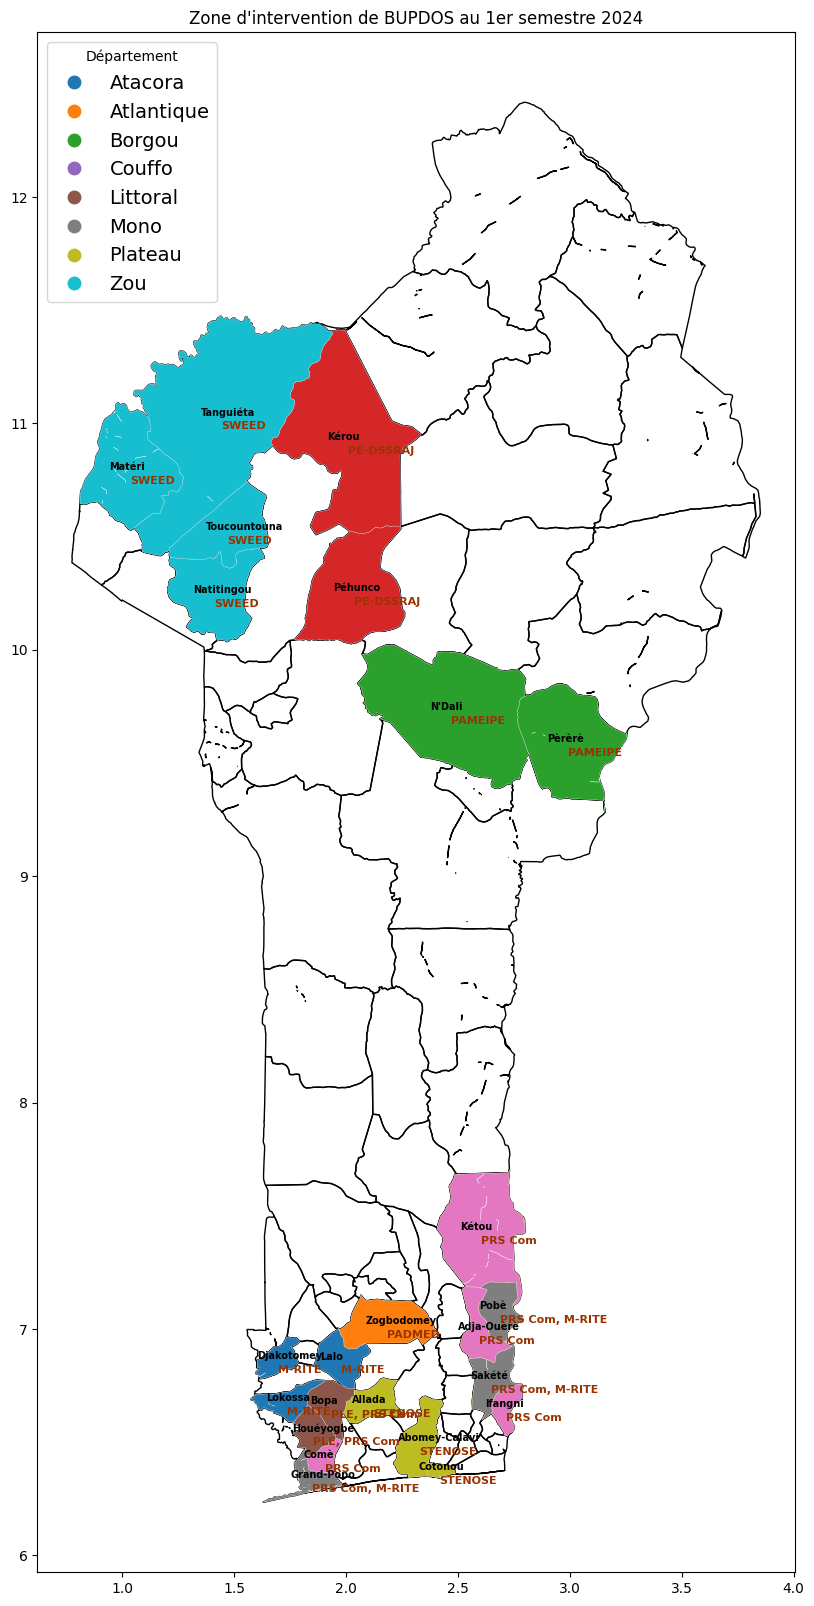

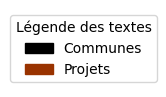

In [291]:
#commune d'intervention de Bupdos

fig, ax=plt.subplots(figsize=(20,20))
shp.plot(ax=ax,edgecolor='black',color='None',legend=False)
shp_filtered = shp[shp['NAME_2'].isin(com_intervention)]
for x, y, label in zip(shp_filtered.geometry.centroid.x, shp_filtered.geometry.centroid.y, shp_filtered['NAME_2']):
    ax.annotate(label, xy=(x, y), xytext=(-15,0), textcoords="offset points", fontsize=7, color='black',fontweight='semibold')

shp_filtered.plot(ax=ax, column='NAME_1',legend=True, legend_kwds={'loc':'upper left', 'title':"Département", 'prop':{'size': 14}})

shp_filtered.plot(ax=ax, column='projet', edgecolor='white',linewidth=0.205)
for x, y, label in zip(shp_filtered.geometry.centroid.x, shp_filtered.geometry.centroid.y, shp_filtered['projet']):
    ax.annotate(label, xy=(x, y), xytext=(0,-10), textcoords="offset points", fontsize=8, color='#993300',fontweight='bold')
plt.title("Zone d'intervention de BUPDOS au 1er semestre 2024")

plt.savefig('Carte')

fig_legend, ax_legend = plt.subplots(figsize=(1, 1))
handles = [
    mpatches.Patch(color='black', label='Communes'),
    mpatches.Patch(color='#993300', label='Projets')
]
ax_legend.legend(handles=handles, loc='center', title="Légende des textes")
ax_legend.axis('off')